# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

<i> According to the paper, "The dataset collected is related to <b> 17 campaigns </b> that occurred between May 2008 and November 2010, corresponding to a total of 79354 contacts." </i>

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [306]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.options.display.max_columns = None
import seaborn as sns
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import time

In [307]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')
df.shape

(41188, 21)

In [308]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



<AxesSubplot:>

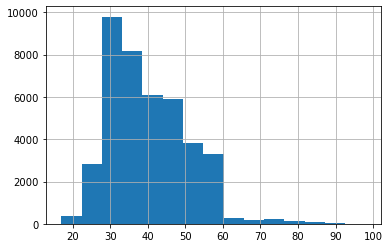

In [309]:
df['age'].hist(bins = 15)

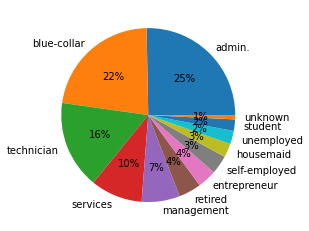

In [310]:
t = df.job.value_counts().rename_axis('values').reset_index(name='counts')
plt.pie(t['counts'], labels = t['values'], autopct='%1.0f%%')
plt.show()

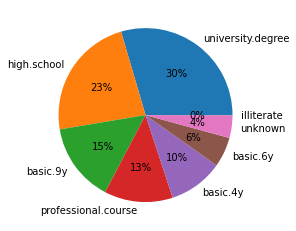

In [311]:
t = df.education.value_counts().rename_axis('values').reset_index(name='counts')
plt.pie(t['counts'], labels = t['values'], autopct='%1.0f%%')
plt.show()

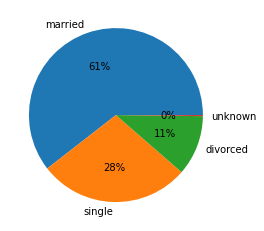

In [312]:
t = df.marital.value_counts().rename_axis('values').reset_index(name='counts')
plt.pie(t['counts'], labels = t['values'], autopct='%1.0f%%')
plt.show()

In [313]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

- It looks like the data doesn't have any missing values, but from the data dictionary, we know that missing values are already filled by 'unknown' or 'nonexistent' in some cases

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

- After checking the paper and data dictionary, the task is to decide that <i> has the client subscribed a term deposit? </i> For this question, y column can be used as label.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [315]:
model_df = df.iloc[:,[0,1,2,3,4,5,6,-1]]
model_df.shape

(41188, 8)

In [316]:
for c in model_df.columns:
    print('\n\033[1m' + '---' +  c + '---'+ '\033[0m')
    print(model_df[c].value_counts())


---age---
31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
94       1
87       1
95       1
Name: age, Length: 78, dtype: int64

---job---
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

---marital---
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

---education---
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

---default---
no         32588
unknown     8597
yes            3
Name: default, dtype: int64

---housing---
yes        21576
n

In [317]:
# tried to distribute in balance
model_df.age = np.where(model_df.age < 35, 'under_35', # 14754
                        np.where((model_df.age >= 35) & (model_df.age < 50), 'between_35_50', # 18379
                                 np.where(model_df.age >= 50, 'over_50', 'other'))) # 8055 // 0 other

C:\Users\BERRA NAZ OZEFE\AppData\Local\Temp\ipykernel_10600\2822226133.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df.age = np.where(model_df.age < 35, 'under_35', # 14754


In [318]:
model_df.default = np.where(model_df.default == 'no', 0,
                        np.where(model_df.default == 'yes', 1, -1))

C:\Users\BERRA NAZ OZEFE\AppData\Local\Temp\ipykernel_10600\3345705925.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df.default = np.where(model_df.default == 'no', 0,


In [319]:
model_df.housing = np.where(model_df.housing == 'no', 0,
                        np.where(model_df.housing == 'yes', 1, -1))

C:\Users\BERRA NAZ OZEFE\AppData\Local\Temp\ipykernel_10600\2808983553.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df.housing = np.where(model_df.housing == 'no', 0,


In [320]:
model_df.loan = np.where(model_df.loan == 'no', 0,
                        np.where(model_df.loan == 'yes', 1, -1))

C:\Users\BERRA NAZ OZEFE\AppData\Local\Temp\ipykernel_10600\2491619463.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df.loan = np.where(model_df.loan == 'no', 0,


In [321]:
model_df.y = np.where(model_df.y == 'no', 0,
                        np.where(model_df.y == 'yes', 1, -1))

C:\Users\BERRA NAZ OZEFE\AppData\Local\Temp\ipykernel_10600\3632673732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df.y = np.where(model_df.y == 'no', 0,


In [322]:
model_df = pd.get_dummies(model_df, columns = ['age', 'job', 'marital', 'education', 'default', 'loan', 'housing'], drop_first = True)
model_df.shape

(41188, 30)

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [323]:
data = model_df.drop(columns = ['y'])
label = model_df[['y']]
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size = 0.3, random_state = 0)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [324]:
dummy = DummyClassifier(strategy="most_frequent").fit(X_train, y_train)
print(classification_report(y_test, dummy.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     10969
           1       0.00      0.00      0.00      1388

    accuracy                           0.89     12357
   macro avg       0.44      0.50      0.47     12357
weighted avg       0.79      0.89      0.83     12357



C:\Users\BERRA NAZ OZEFE\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\BERRA NAZ OZEFE\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\BERRA NAZ OZEFE\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [325]:
print("Models should have accuracy higher than", accuracy_score(y_test, dummy.predict(X_test)))

Models should have accuracy higher than 0.8876750020231448


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [326]:
logreg = LogisticRegression(random_state = 0).fit(X_train, y_train)
print(classification_report(y_test, logreg.predict(X_test)))

C:\Users\BERRA NAZ OZEFE\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.89      1.00      0.94     10969
           1       0.00      0.00      0.00      1388

    accuracy                           0.89     12357
   macro avg       0.44      0.50      0.47     12357
weighted avg       0.79      0.89      0.83     12357



C:\Users\BERRA NAZ OZEFE\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\BERRA NAZ OZEFE\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\BERRA NAZ OZEFE\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Problem 9: Score the Model

What is the accuracy of your model?

In [327]:
print("Accuracy score is", accuracy_score(y_test, logreg.predict(X_test)))

Accuracy score is 0.8876750020231448


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [328]:
models = ['Logistic Regression', 'KNN', 'Decision Tree', 'SVM']
times = []
train_acc = []
test_acc = []

In [329]:
start_time = time.time()
logreg =LogisticRegression(random_state=0).fit(X_train, y_train)
times.append((time.time() - start_time))

start_time = time.time()
knn = KNeighborsClassifier().fit(X_train, y_train)
times.append((time.time() - start_time))

start_time = time.time()
dtree = DecisionTreeClassifier(random_state = 0).fit(X_train, y_train)
times.append((time.time() - start_time))

start_time = time.time()
svc = SVC(random_state = 0).fit(X_train, y_train)
times.append((time.time() - start_time))

C:\Users\BERRA NAZ OZEFE\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BERRA NAZ OZEFE\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\BERRA NAZ OZEFE\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [330]:
for model in [logreg, knn, dtree, svc]:
    train_acc.append(accuracy_score(y_train, model.predict(X_train)))
    test_acc.append(accuracy_score(y_test, model.predict(X_test)))

In [331]:
results = pd.DataFrame({'Model Train': models,
                        'Time': times,
                        'Train Accuracy': train_acc,
                        'Test Accuracy': test_acc})
results

,Model Train,Time,Train Accuracy,Test Accuracy
0,Logistic Regression,0.932145,0.887205,0.887675
1,KNN,0.009993,0.885401,0.883548
2,Decision Tree,0.267035,0.892373,0.880958
3,SVM,81.246329,0.887205,0.887675


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

##### Checking Features

In [332]:
temp = pd.DataFrame({'feature': X_train.columns, 'importance': dtree.feature_importances_})
temp.sort_values(by = 'importance', ascending = False)

,feature,importance
23,default_0,0.071489
9,job_student,0.069548
6,job_retired,0.068135
13,marital_married,0.063180
27,housing_0,0.055868
28,housing_1,0.050892
18,education_high.school,0.048364
1,age_under_35,0.046279
17,education_basic.9y,0.045646
26,loan_1,0.042242


In [333]:
# based on feature importances and value distributions, dropping 2 columns
model_df2 = df.iloc[:,[0,1,2,3,4,5,6,-1]]
model_df2 = model_df2.drop(columns = ['default', 'loan'])
# tried to distribute in balance
model_df2.age = np.where(model_df2.age < 35, 'under_35', # 14754
                        np.where((model_df2.age >= 35) & (model_df2.age < 50), 'between_35_50', # 18379
                                 np.where(model_df2.age >= 50, 'over_50', 'other'))) # 8055 // 0 other
model_df2 = pd.get_dummies(model_df2, columns = ['age', 'job', 'marital', 'education', 'housing'], drop_first = True)

data = model_df2.drop(columns = ['y'])
label = model_df2[['y']]
X_train2, X_test2, y_train2, y_test2 = train_test_split(data, label, test_size = 0.3, random_state = 0)

In [334]:
models = ['Logistic Regression', 'KNN', 'Decision Tree', 'SVM']
times = []
train_acc = []
test_acc = []

start_time = time.time()
logreg2 =LogisticRegression(random_state=0).fit(X_train2, y_train2)
times.append((time.time() - start_time))

start_time = time.time()
knn2 = KNeighborsClassifier().fit(X_train2, y_train2)
times.append((time.time() - start_time))

start_time = time.time()
dtree2 = DecisionTreeClassifier(random_state = 0).fit(X_train2, y_train2)
times.append((time.time() - start_time))

start_time = time.time()
svc2 = SVC(random_state = 0).fit(X_train2, y_train2)
times.append((time.time() - start_time))

C:\Users\BERRA NAZ OZEFE\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BERRA NAZ OZEFE\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\BERRA NAZ OZEFE\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [335]:
for model in [logreg2, knn2, dtree2, svc2]:
    train_acc.append(accuracy_score(y_train2, model.predict(X_train2)))
    test_acc.append(accuracy_score(y_test2, model.predict(X_test2)))

results2 = pd.DataFrame({'Model Train': models,
                         'Time': times,
                         'Train Accuracy': train_acc,
                         'Test Accuracy': test_acc})
results2

,Model Train,Time,Train Accuracy,Test Accuracy
0,Logistic Regression,0.745126,0.887205,0.887675
1,KNN,0.070002,0.883285,0.881525
2,Decision Tree,0.256029,0.889459,0.884438
3,SVM,40.642669,0.887205,0.887675


*dropping columns didnt help the accuracy (except decision tree - slightly), so decided to not eliminate any of them*

##### Best Performances of Models
From the first table, champion and challanger models are SVM and logistic regression. Thus, this section focuses to improve those.

Also, as evaluation metric, F1-score is going to be focused.

In [336]:
gs_logreg = GridSearchCV(estimator = LogisticRegression(),
                         param_grid = [{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
                                       {'penalty':['none', 'elasticnet', 'l1', 'l2']},
                                       {'C':[0.001, 0.01, 0.1, 1, 10, 100]}],
                         scoring = 'f1',
                         cv = 5,
                         verbose=0).fit(X_train, y_train)
print(classification_report(y_test, gs_logreg.predict(X_test)))

C:\Users\BERRA NAZ OZEFE\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BERRA NAZ OZEFE\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BERRA NAZ OZEFE\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BERRA NAZ OZEFE\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

C:\Users\BERRA NAZ OZEFE\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BERRA NAZ OZEFE\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BERRA NAZ OZEFE\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BERRA NAZ OZEFE\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

C:\Users\BERRA NAZ OZEFE\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BERRA NAZ OZEFE\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BERRA NAZ OZEFE\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BERRA NAZ OZEFE\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     10969
           1       0.00      0.00      0.00      1388

    accuracy                           0.89     12357
   macro avg       0.44      0.50      0.47     12357
weighted avg       0.79      0.89      0.83     12357



C:\Users\BERRA NAZ OZEFE\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\BERRA NAZ OZEFE\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\BERRA NAZ OZEFE\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [304]:
gs_svc = GridSearchCV(estimator = SVC(),
                      param_grid = [{'C': [0.1, 1, 10],
                                     'gamma': ['scale', 'auto'],
                                     'degree': [1,2,3,4]}],
                      scoring = 'f1',
                      cv = 3,
                      verbose=0).fit(X_train, y_train)
print(classification_report(y_test, gs_svc.predict(X_test)))

C:\Users\BERRA NAZ OZEFE\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BERRA NAZ OZEFE\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BERRA NAZ OZEFE\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BERRA NAZ OZEFE\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

C:\Users\BERRA NAZ OZEFE\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BERRA NAZ OZEFE\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BERRA NAZ OZEFE\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BERRA NAZ OZEFE\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

C:\Users\BERRA NAZ OZEFE\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BERRA NAZ OZEFE\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BERRA NAZ OZEFE\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BERRA NAZ OZEFE\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     10969
           1       0.17      0.00      0.01      1388

    accuracy                           0.89     12357
   macro avg       0.53      0.50      0.47     12357
weighted avg       0.81      0.89      0.83     12357



In [305]:
gs_svc.best_params_

{'C': 10, 'degree': 1, 'gamma': 'scale'}

### After all trials, SVC with parameters C = 10 & degree = 1 & gamma = scale gives best results with F1-score = 0.83 and accuracy score = 0.89